# TCC PUC - Ciência de Dados e Big Data


# 1. Definição do Problema

# 2. Coleta dos Dados

## 2.1 Extração dos Dados

In [1]:
import json
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt # lib para utilização dos gráficos

# Necessário para visualização automática dos gráficos no Jupyter
%matplotlib inline

from pathlib import Path
from urllib.request import urlopen # Faz a requisição no servidor e obtem a resposta
from pandas import json_normalize #package for flattening json in pandas df

# Abrindo arquivo json de coleta dos dados na fonte 
p = Path(r'C:\Users\karen\Desktop\TCC_PUC_BigData\data\data-cars.json')

# read json
with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())
                      
df_cars = json_normalize(data)
df_cars.head() # exibe DataFrame

,UniqueId,PhotoPath,ListingType,ProductCode,Channels,FipePercent,IPVApaid,Licensed,Warranty,OnlyOwner,...,Seller.AdType.id,Seller.AdType.Value,Seller.BudgetInvestimento,Seller.DealerScore,Seller.CarDelivery,Seller.TrocaComTroco,Prices.Price,Prices.SearchPrice,GoodDeal,LongComment
0,35925939,2021\202102\20210216\toyota-corolla-1.8-seg-16...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",81.0,True,True,False,True,...,4,Pessoa Física,0,0,False,False,34990.0,34990.0,NaN,NaN
1,35926195,2021\202102\20210216\mitsubishi-l200-triton-3....,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",94.0,True,True,False,True,...,4,Pessoa Física,0,0,False,False,67300.0,67300.0,True,NaN
2,35925488,2021\202102\20210216\toyota-hilux-3.0-srv-4x4-...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",95.0,True,True,False,True,...,4,Pessoa Física,0,0,False,False,69600.0,69600.0,True,NaN
3,35924588,2021\202102\20210216\hyundai-sonata-2.4-mpfi-i...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",83.0,True,True,False,True,...,4,Pessoa Física,0,0,False,False,42990.0,42990.0,NaN,NaN
4,35929738,2021\202102\20210216\chevrolet-celta-1.0-mpfi-...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",75.0,True,True,False,True,...,4,Pessoa Física,0,0,False,False,18100.0,18100.0,NaN,NaN


In [2]:
# Abrindo arquivo json de coleta dos dados da tabela Fipe
p = Path(r'C:\Users\karen\Desktop\TCC_PUC_BigData\data\data-cars-fipe.json')

# read json
with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())
                      
df_cars_fipe = json_normalize(data)
df_cars_fipe.head() # exibe DataFrame

,Fipe,UniqueId
0,43270.0,35925939
1,71931.0,35926195
2,73593.0,35925488
3,51487.0,35924588
4,24097.0,35929738


In [3]:
#Unindo os datasets infos detalhes do carro
df_cars = df_cars.join(df_cars_fipe.set_index('UniqueId')[['Fipe']], on='UniqueId')
df_cars

,UniqueId,PhotoPath,ListingType,ProductCode,Channels,FipePercent,IPVApaid,Licensed,Warranty,OnlyOwner,...,Seller.AdType.Value,Seller.BudgetInvestimento,Seller.DealerScore,Seller.CarDelivery,Seller.TrocaComTroco,Prices.Price,Prices.SearchPrice,GoodDeal,LongComment,Fipe
0,35925939,2021\202102\20210216\toyota-corolla-1.8-seg-16...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",81.0,True,True,False,True,...,Pessoa Física,0,0,False,False,34990.0,34990.0,NaN,NaN,43270.0
1,35926195,2021\202102\20210216\mitsubishi-l200-triton-3....,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",94.0,True,True,False,True,...,Pessoa Física,0,0,False,False,67300.0,67300.0,True,NaN,71931.0
2,35925488,2021\202102\20210216\toyota-hilux-3.0-srv-4x4-...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",95.0,True,True,False,True,...,Pessoa Física,0,0,False,False,69600.0,69600.0,True,NaN,73593.0
3,35924588,2021\202102\20210216\hyundai-sonata-2.4-mpfi-i...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",83.0,True,True,False,True,...,Pessoa Física,0,0,False,False,42990.0,42990.0,NaN,NaN,51487.0
4,35929738,2021\202102\20210216\chevrolet-celta-1.0-mpfi-...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",75.0,True,True,False,True,...,Pessoa Física,0,0,False,False,18100.0,18100.0,NaN,NaN,24097.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,5284217,NaN,U,161,"[{'id': 48, 'Value': 'Webmotors'}]",99.0,False,True,True,True,...,Pessoa Física,0,0,False,False,15900.0,15900.0,NaN,"Impecável, Aceito troca e financio. Ligue para...",16121.0
92,35903423,2021\202102\20210216\honda-civic-1.5-lx-16v-ga...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",76.0,False,False,False,False,...,Pessoa Física,0,0,False,False,15990.0,15990.0,NaN,NaN,21118.0
93,35726544,2021\202101\20210130\audi-q8-3.0-tfsi-gasolina...,U,1606,"[{'id': 49, 'Value': 'CompreAuto'}, {'id': 48,...",107.0,True,True,True,True,...,Loja,0,1,True,True,580000.0,580000.0,NaN,"TORQUE 51,0 KGFM / VOLUME DO PORTA MALAS 605 L...",542443.0
94,32057561,2020\202003\20200307\volvo-xc60-3.0-t6-rd-awd-...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",91.0,True,True,False,False,...,Pessoa Física,0,0,False,False,111999.0,111999.0,True,VALOR PRA VENDER!!!! Veículo BLINDADO BSS NIVE...,123134.0


# 3. Tratamento dos Dados

Nessa seção é analisado os dados que são necessários para continuidade do trabalho.
Os dados necessários serão formatados e/ou utilizado filtros se necessário.
Os dados que não forem necessários serão removidos.

## 3.1 Dados dos Carros

Removendo colunas desnecessárias

In [4]:
del df_cars['Channels'] # Coluna Channels - Canal de origem da venda
del df_cars['ListingType'] # Coluna Tipo de Listagem
del df_cars['ProductCode'] # Coluna Código Produto
del df_cars['PhotoPath'] # Coluna PhotoPath
#del df_cars['UniqueId'] # Coluna UniqueId
del df_cars['FipePercent'] # Coluna FipePercent

#del df_cars['VipAutopago'] # Coluna VipAutopago

# A Webmotors destaca com o selo de Alerta Super preço veículos anunciados com valor de 5 a 15%  abaixo da média FIPE
# Essa coluna será removida, pois utilizaremos outros parâmetros para classificar como bom negócio (não apenas o valor FIPE)
del df_cars['GoodDeal'] # Coluna Bom Negócio? (baseado no valor da tabela FIPE)

# Group - Media
del df_cars['Media.Photos'] # Coluna Fotos Mídia

# Group - Seller
del df_cars['Seller.Id'] # Coluna tipo de venda Id
del df_cars['Seller.SellerType'] # Coluna tipo de venda Id (PF, PJ)
del df_cars['Seller.AdType.id'] # Coluna tipo de venda Id (Pessoa Física, Pessoa Jurídica)
del df_cars['Seller.AdType.Value'] # Coluna tipo de venda Value (Pessoa Física, Pessoa Jurídica)
del df_cars['Seller.CarDelivery'] # Coluna Entrega do Carro (true, false)
del df_cars['Seller.TrocaComTroco'] # Coluna Seller.TrocaComTroco
del df_cars['Seller.BudgetInvestimento'] # Coluna BudgetInvestimento
del df_cars['Seller.DealerScore'] # Coluna DealerScore
del df_cars['Seller.City'] # Coluna Seller.City
del df_cars['Seller.State'] # Coluna Seller.State

# Group - Prices
del df_cars['Prices.SearchPrice'] # Coluna Prices.SearchPrice valor utilizado no campo busca do site

# Group - Specification
del df_cars['Specification.Make.id'] # Coluna Specification.Make.id
del df_cars['Specification.Version.id'] # Coluna Specification.Version.id
del df_cars['Specification.Version.Value'] # Coluna Specification.Version.Value
del df_cars['Specification.Model.id'] # Coluna Especificação do Modelo Id
del df_cars['Specification.Color.IdPrimary'] # Coluna Specification.Color.IdPrimary id da cor
del df_cars['Specification.VehicleAttributes'] # Coluna Specification.VehicleAttributes (atributos já organizados em forma de colunas)
del df_cars['Specification.YearFabrication'] # Coluna Specification.YearFabrication, consideraremos o ano do Modelo do carro



Renomeando o nome das colunas

In [5]:
df_cars.rename({'Specification.Title': 'Title', 
                'Specification.Make.Value': 'Make',
                'Specification.Model.Value': 'Model',
                'Specification.Version.Value': 'Version',
                'Specification.YearModel': 'YearModel',
                'Specification.YearFabrication': 'YearFabrication',
                'Specification.Odometer': 'Odometer',
                'Specification.Transmission': 'Transmission',
                'Specification.NumberPorts': 'NumberPorts',
                'Specification.BodyType': 'BodyType',
                'Specification.Armored': 'Armored',
                'Specification.Color.Primary': 'Color',
                'Prices.Price': 'Price'
               }, axis=1, inplace=True)

Formatando os dados

In [6]:
# Visualizando informações sobre os dados antes da formatação
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UniqueId      96 non-null     int64  
 1   IPVApaid      96 non-null     bool   
 2   Licensed      96 non-null     bool   
 3   Warranty      96 non-null     bool   
 4   OnlyOwner     96 non-null     bool   
 5   Title         96 non-null     object 
 6   Make          96 non-null     object 
 7   Model         96 non-null     object 
 8   YearModel     96 non-null     float64
 9   Odometer      96 non-null     float64
 10  Transmission  96 non-null     object 
 11  NumberPorts   96 non-null     object 
 12  BodyType      96 non-null     object 
 13  Armored       96 non-null     object 
 14  Color         96 non-null     object 
 15  Price         96 non-null     float64
 16  LongComment   67 non-null     object 
 17  Fipe          96 non-null     float64
dtypes: bool(4), float64(4), int64(1)

In [7]:
# Convertendo o ano de Float64 para Int64 (obs: o ano modelo está vindo como float 1 casa decimal)
df_cars['YearModel'] = df_cars['YearModel'].astype('int64')

# Comentários vazios estão vindo como NaN
df_cars['LongComment'] = df_cars['LongComment'].fillna('')

# Convertendo dados que estão como object para string
df_cars['Title'] = df_cars['Title'].astype('string')
df_cars['Make'] = df_cars['Make'].astype('string')
df_cars['Model'] = df_cars['Model'].astype('string')
df_cars['Transmission'] = df_cars['Transmission'].astype('string')
df_cars['BodyType'] = df_cars['BodyType'].astype('string')
df_cars['Color'] = df_cars['Color'].astype('string')
df_cars['LongComment'] = df_cars['LongComment'].astype('string')

# Convertendo dados que estão como object para Int64
df_cars['NumberPorts'] = df_cars['NumberPorts'].astype('int64')

# Convertendo coluna Armored de (S-Sim e N-Não) para (True-Sim e False-Não)
df_cars['Armored'] = np.where(df_cars['Armored'] == 'S', True,False)



In [8]:
#Verifica se existe algum valor nulo após o tratamento dos dados
df_cars.isnull().sum()

UniqueId        0
IPVApaid        0
Licensed        0
Warranty        0
OnlyOwner       0
Title           0
Make            0
Model           0
YearModel       0
Odometer        0
Transmission    0
NumberPorts     0
BodyType        0
Armored         0
Color           0
Price           0
LongComment     0
Fipe            0
dtype: int64

In [9]:
# Visualizando informações sobre os dados já formatados
df_cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UniqueId      96 non-null     int64  
 1   IPVApaid      96 non-null     bool   
 2   Licensed      96 non-null     bool   
 3   Warranty      96 non-null     bool   
 4   OnlyOwner     96 non-null     bool   
 5   Title         96 non-null     string 
 6   Make          96 non-null     string 
 7   Model         96 non-null     string 
 8   YearModel     96 non-null     int64  
 9   Odometer      96 non-null     float64
 10  Transmission  96 non-null     string 
 11  NumberPorts   96 non-null     int64  
 12  BodyType      96 non-null     string 
 13  Armored       96 non-null     bool   
 14  Color         96 non-null     string 
 15  Price         96 non-null     float64
 16  LongComment   96 non-null     string 
 17  Fipe          96 non-null     float64
dtypes: bool(5), float64(3), int64(3)

# 4. Análise e Exploração dos Dados 

## 4.1 Analisando os Dados

In [10]:
# Carros que estão abaixo da tabela FIPE e IPVA Pago
cars = (df_cars['Price'] < df_cars['Fipe']) & (df_cars['IPVApaid'])
df_cars[cars].shape[0]


52

In [11]:
# Carros que estão acima da tabela FIPE
cars = (df_cars['Price'] > df_cars['Fipe']) 
df_cars[cars][['Fipe', 'Price']]

,Fipe,Price
16,95894.0,99999.0
18,118552.0,159900.0
26,80102.0,85990.0
27,33645.0,34900.0
31,145138.0,168000.0
32,82397.0,85000.0
34,408190.0,409900.0
36,48251.0,50900.0
38,92453.0,105000.0
41,75816.0,85900.0


In [12]:
# Quantidade de carros por cor
cars = df_cars['Color'].value_counts()
cars.to_frame(name='Qtd Carros')

,Qtd Carros
Preto,41
Prata,18
Branco,16
Cinza,9
Azul,4
Vermelho,3
Verde,3
Marrom,1
Dourado,1


In [13]:
# Essa coluna identificará se o valor do carro está acima ou abaixo do valor da tabela Fipe (True-sim, False-não)
df_cars['PriceFipeOk'] = (df_cars['Price'] <= df_cars['Fipe']) 

# Essa coluna identificará se o veículo tem mais de 10 anos (True- sim, False-não)
now = datetime.datetime.now() # Pega a data atual 

df_cars['Year>10Years'] = (now.year - df_cars['YearModel'] > 10) # verifica se a diferença do ano é superior a 10

df_cars

,UniqueId,IPVApaid,Licensed,Warranty,OnlyOwner,Title,Make,Model,YearModel,Odometer,Transmission,NumberPorts,BodyType,Armored,Color,Price,LongComment,Fipe,PriceFipeOk,Year>10Years
0,35925939,True,True,False,True,TOYOTA COROLLA 1.8 SE-G 16V FLEX 4P AUTOMÁTICO,TOYOTA,COROLLA,2010,90000.0,Automática,4,Sedã,False,Prata,34990.0,,43270.0,True,True
1,35926195,True,True,False,True,MITSUBISHI L200 TRITON 3.2 HPE 4X4 CD 16V TURB...,MITSUBISHI,L200 TRITON,2012,68000.0,Automática,4,Picape,False,Branco,67300.0,,71931.0,True,False
2,35925488,True,True,False,True,TOYOTA HILUX 3.0 SRV 4X4 CD 16V TURBO INTERCOO...,TOYOTA,HILUX,2008,97000.0,Automática,4,Picape,False,Preto,69600.0,,73593.0,True,True
3,35924588,True,True,False,True,HYUNDAI SONATA 2.4 MPFI I4 16V 182CV GASOLINA ...,HYUNDAI,SONATA,2012,55000.0,Automática,4,Sedã,False,Preto,42990.0,,51487.0,True,False
4,35929738,True,True,False,True,CHEVROLET CELTA 1.0 MPFI LS 8V FLEX 4P MANUAL,CHEVROLET,CELTA,2014,61000.0,Manual,4,Hatchback,False,Branco,18100.0,,24097.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,5284217,False,True,True,True,FORD KA 1.6 MPI 8V FLEX 2P MANUAL,FORD,KA,2009,90000.0,Manual,0,Hatchback,False,Prata,15900.0,"Impecável, Aceito troca e financio. Ligue para...",16121.0,True,True
92,35903423,False,False,False,False,HONDA CIVIC 1.7 LX 16V GASOLINA 4P AUTOMÁTICO,HONDA,CIVIC,2006,92868.0,Automática,4,Sedã,False,Prata,15990.0,,21118.0,True,True
93,35726544,True,True,True,True,AUDI Q8 3.0 TFSI GASOLINA PERFORMANCE BLACK QU...,AUDI,Q8,2020,7340.0,Automática,4,Utilitário esportivo,False,Cinza,580000.0,"TORQUE 51,0 KGFM / VOLUME DO PORTA MALAS 605 L...",542443.0,False,False
94,32057561,True,True,False,False,VOLVO XC60 3.0 T6 RD AWD TURBO GASOLINA 4P AUT...,VOLVO,XC60,2014,79900.0,Automática,4,Utilitário esportivo,True,Branco,111999.0,VALOR PRA VENDER!!!! Veículo BLINDADO BSS NIVE...,123134.0,True,False


In [14]:
# Estatísticas descritivas
'''
Teremos como resultado um DataFrame com as colunas count a frequência; mean a média; std o desvio padrão; mino valor mínimo; 25% o primeiro quartio, 50% a mediana, 75% o terceiro quartio e max, o valor máximo.
'''
df_cars['Odometer'].describe().round(2)

#df_cars['Odometer'].aggregate(['min', 'max', 'sum'])

count        96.00
mean      86457.45
std       37339.60
min        7340.00
25%       61797.00
50%       85500.00
75%      107000.00
max      200223.00
Name: Odometer, dtype: float64

In [15]:
# Agrupa e exibe carros pelo preço médio de cada modelo.
cars_group_model_mean = df_cars.groupby(['Model', 'Make'], as_index=False)

# Exibe colunas:
# Model: valor único (agrupado)
# Preço: média de preço daquele modelo 
cars_group_model_mean = cars_group_model_mean.agg({'Price':np.mean, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para aprensentá-las
cars_group_model_mean = cars_group_model_mean.rename(columns={'Model':'Modelo', 'Make':'Marca','Price':'Preço Médio', 'UniqueId': 'Quantidade'})

# Ordenando em ordem Decrescente pela coluna modelo
cars_group_model_mean = cars_group_model_mean.sort_values('Modelo', ascending=True)

cars_group_model_mean


,Modelo,Marca,Preço Médio,Quantidade
0,2008,PEUGEOT,50900.00,1
1,307,PEUGEOT,17500.00,1
2,408,PEUGEOT,27500.00,1
3,640i,BMW,151900.00,1
4,750Li,BMW,420000.00,1
...,...,...,...,...
58,X5,BMW,149900.00,1
59,X80,LIFAN,97000.00,1
60,XC60,VOLVO,91999.67,3
61,XC90,VOLVO,36000.00,2


In [24]:
# Agrupa e exibe carros pelo número médio de km rodados por ano por modelo
cars_group_model_mean_km_year = df_cars.groupby(['Model', 'YearModel'], as_index=False)

# Exibe colunas:
# Model: valor único (agrupado)
# YearModel: valor único (agrupado)
# Odometer: média de km daquele modelo 
cars_group_model_mean_km_year = cars_group_model_mean_km_year.agg({'Odometer':np.mean, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para aprensentá-las
cars_group_model_mean_km_year = cars_group_model_mean_km_year.rename(columns={'Model':'Modelo', 'YearModel':'Ano Modelo','Odometer':'Km Médio', 'UniqueId': 'Quantidade'})

cars_group_model_mean_km_year


,Modelo,Ano Modelo,Km,Quantidade
0,2008,2017,25000.0,1
1,307,2009,130000.0,1
2,408,2012,105000.0,1
3,640i,2014,79000.0,1
4,750Li,2017,41839.0,1
...,...,...,...,...
80,XC60,2013,75000.0,1
81,XC60,2014,79900.0,1
82,XC90,2005,70000.0,1
83,XC90,2011,115000.0,1


In [16]:
# Agrupa os carros por Ano e Calcula a Média e a Quantidade por Ano

# Agrupa por ano e remove o index (YearModel)
cars_group_mean_year = df_cars.groupby(['YearModel'], as_index=False)

# Exibe colunas:
# YearModel: valor único (agrupado)
# Odometer: média de valores (Km)
# UniqueId: quantidade de registros 
cars_group_mean_year = cars_group_mean_year.agg({'YearModel': np.unique, 'Odometer':np.mean, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para aprensentá-las
cars_group_mean_year = cars_group_mean_year.rename(columns={'YearModel':'Ano','Odometer':'Km', 'UniqueId': 'Quantidade'})

# Ordenando em ordem Decrescente pela coluna ano
cars_group_mean_year = cars_group_mean_year.sort_values('Ano', ascending=False)
#.reset_index()

cars_group_mean_year



,Ano,Km,Quantidade
20,2020,7420.00,2
19,2019,31000.00,1
18,2018,16819.00,1
17,2017,36886.57,7
16,2016,67772.67,6
15,2015,54000.00,3
14,2014,73402.17,12
13,2013,77772.09,11
12,2012,78250.00,8
11,2011,86187.50,8


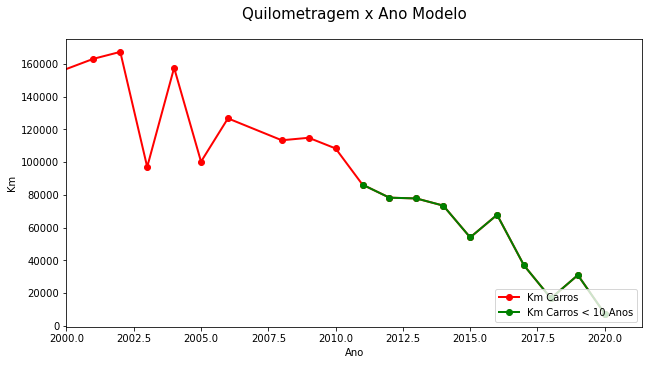

In [17]:
# Gráfico variação de Quilometragem e Ano do carro

# Pega o resultado do agrupamento (Ano + Quilometragem) para exibir no gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando gráfico
eixo.plot(cars_group_mean_year['Ano'], cars_group_mean_year['Km'], color= 'red', lw=2, marker = 'o')

# Exibe no gráfico somente os carros entre [2000 - Ano Atual]
eixo.set_xlim(2000)

# Adicionando cor de destaque para carros que ainda estão entre 10 anos 
cars_10_years = 2020 - cars_group_mean_year['Ano']  < 10
eixo.plot(cars_group_mean_year[cars_10_years]['Ano'], cars_group_mean_year[cars_10_years]['Km'], color= 'green', lw=2, marker = 'o')

# Alterando Título e Labels
eixo.set_title('Quilometragem x Ano Modelo', fontsize=15, pad=20)
eixo.set_ylabel('Km')
eixo.set_xlabel('Ano')

# Adicionando Legenda
eixo.legend(['Km Carros', 'Km Carros < 10 Anos'], loc = 'lower right')


### Preço Fipe (OK ou Não) das 10 Maiores Marcas

In [18]:
# Agrupa os carros por Make e quantidade de carros com PriceFipeOk (True or False)
# obs: Consideremos apenas as 10 maiores marcas de carro 
# https://www.noticiasautomotivas.com.br/marcas-de-carro-as-10-maiores-e-melhores-do-mundo/
make_top_10 = ['TOYOTA','VOLKSWAGEN','FORD','HONDA','NISSAN','HYUNDAI','CHEVROLET','KIA','MERCEDES-BENZ','BMW']

# Agrupa por marca e remove o index (Make)  
cars_group_make_fipe = pd.get_dummies(df_cars, columns=['PriceFipeOk']).groupby(['Make'], as_index=False).sum()

# Renomeando as colunas para aprensentá-las 
cars_group_make_fipe = cars_group_make_fipe.rename(columns={'Make':'Marca', 'PriceFipeOk_True':'Preço Fipe OK', 'PriceFipeOk_False':'Preço Fipe Não OK'})

# Exibe colunas:
# Make: valor único (agrupado)
# PriceFipeOk_True: quantidade de registros Preço Fipe OK
# PriceFipeOk_False: quantidade de registros Preço Fipe Não OK
cars_group_make_fipe = cars_group_make_fipe[['Marca', 'Preço Fipe OK', 'Preço Fipe Não OK']]

# Pega apenas os registros que estão com o Preço Fipe OK (PriceFipeOk) e que estão entre as 10 maiores marcas veículos
cars_group_make_fipe = cars_group_make_fipe[(cars_group_make_fipe['Marca'].isin(make_top_10))]

cars_group_make_fipe

,Marca,Preço Fipe OK,Preço Fipe Não OK
1,BMW,4,1
2,CHEVROLET,7,0
5,FORD,6,0
6,HONDA,2,1
7,HYUNDAI,4,0
10,KIA,1,0
14,MERCEDES-BENZ,5,6
21,TOYOTA,3,0
22,VOLKSWAGEN,2,1


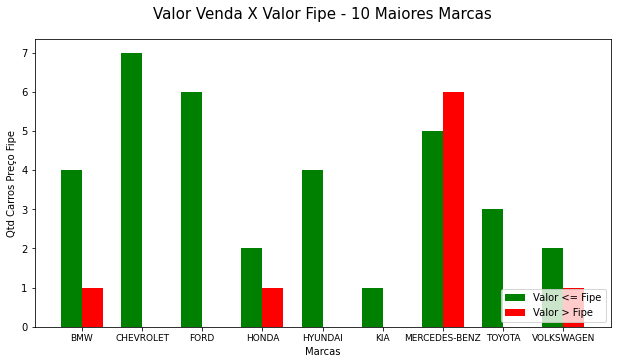

In [19]:
# Gráfico variação de Marcas e Preço Fipe

# Pega o resultado do agrupamento (Marca + Preço Fipe) para exibir no gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando os Índices das marcas
indice = np.arange(len(cars_group_make_fipe))

width = 0.35  # tamanho das barras

# Adicionando barras Preço <= Valor Fipe
eixo.bar(indice - width/2, cars_group_make_fipe['Preço Fipe OK'], width, color= 'green')

# Adicionando barras Preço > Valor Fipe
eixo.bar(indice + width/2, cars_group_make_fipe['Preço Fipe Não OK'], width, color= 'red')

# Alterando Título e Labels
eixo.set_title('Valor Venda X Valor Fipe - 10 Maiores Marcas', fontsize=15, pad=20)
eixo.set_xlabel('Marcas')
eixo.set_ylabel('Qtd Carros Preço Fipe')

eixo.set_xticks(indice)
eixo.set_xticklabels(cars_group_make_fipe['Marca'], fontsize=9)

# Adicionando Legenda
eixo.legend(['Valor <= Fipe', 'Valor > Fipe'], loc = 'lower right')



In [20]:
# Agrupa os carros onde PriceFipeOk (o valor está <= ao valor da tabela Fipe ou valor > valor da tabela Fipe)

# Fazer agrupamento somente com carros com ano <= 10 anos
cars_10_years = 2020 - df_cars['YearModel']  <= 10

# Agrupa por PriceFipeOk e remove o index (PriceFipeOk)
# somente para carros onde ano <= 10
cars_group_fipe_10_years = df_cars[cars_10_years].groupby(['PriceFipeOk'], as_index=False)

# Exibe colunas:
# PriceFipeOk: valor único (agrupado)
# UniqueId: quantidade de registros 
cars_group_fipe_10_years = cars_group_fipe_10_years.agg({'PriceFipeOk': np.unique, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para aprensentá-las
cars_group_fipe_10_years = cars_group_fipe_10_years.rename(columns={'PriceFipeOk':'Preço Fipe OK', 'UniqueId': 'Quantidade'})


# Alterando os valores das linhas da coluna Preço Fipe OK para o label text
# obs: Isso facilitará no uso do gráfico logo abaixo
cars_group_fipe_10_years.loc[cars_group_fipe_10_years['Preço Fipe OK'] == True, ['Preço Fipe OK']] = 'Valor <= Fipe'
cars_group_fipe_10_years.loc[cars_group_fipe_10_years['Preço Fipe OK'] == False, ['Preço Fipe OK']] = 'Valor > Fipe'

# Cálculando a Porcentagem da coluna Quantidade 
# obs: Essa coluna será usada no gráfico abaixo
cars_group_fipe_10_years['Porcentagem'] = (cars_group_fipe_10_years['Quantidade'] / cars_group_fipe_10_years['Quantidade'].sum()) * 100

# ordena o Dataframe para apresentar primeiro os valores Valor > Fipe e posteriormente Valor <= Fipe
# obs: isso garantirá no gráfico esta ordem para utilização da configuração de cores
cars_group_fipe_10_years = cars_group_fipe_10_years.sort_values(by=['Preço Fipe OK'], ascending=False)

cars_group_fipe_10_years

,Preço Fipe OK,Quantidade,Porcentagem
0,Valor > Fipe,25,37.313433
1,Valor <= Fipe,42,62.686567


Text(0.5, 1.0, 'Porcentagem de Carros X Preço Fipe (até 10 anos)')

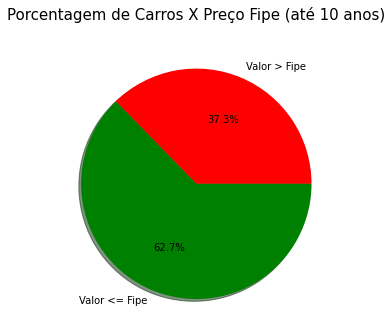

In [21]:
# Gráfico Quantidade de Carros Preço Fipe (valor <= valor Fipe e valor > valor Fipe)

# Pega o resultado do agrupamento (Marca + Preço Fipe) para exibir no gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.pie(cars_group_fipe_10_years['Porcentagem'], labels=cars_group_fipe_10_years['Preço Fipe OK'], autopct='%.1f%%', colors=['red', 'green'], shadow=True)

# Alterando Título e Labels
eixo.set_title('Porcentagem de Carros X Preço Fipe (até 10 anos)', fontsize=15, pad=20)